In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import surp
import arya

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
modelname = "fiducial/run"

In [3]:
walks_raw = pd.read_csv(f"../../models/{modelname}/migration_initial_final.dat")

In [4]:
dt = 0.02

In [5]:
walks = walks_raw.set_index(["zone", "i"])

In [6]:
walks.z_final

zone  i  
0     0     -0.074912
      1     -0.227261
      2      0.281916
      3     -0.184816
      4      0.494429
               ...   
199   670   -2.579888
      671    2.138520
      672    1.574083
      673   -0.847529
      674    0.519452
Name: z_final, Length: 135000, dtype: float64

In [7]:
stars = surp.ViceModel.from_file(f"../../models/{modelname}/model.json").stars_unsampled

In [8]:
stars["t_int"] = np.int64(np.round(stars.formation_time / dt))
stars


,formation_time,zone_origin,zone_final,mass,abs_z,r_origin,r_final,FE_H,O_H,MG_H,...,C_FE,C_O,C_MG,C_N,z,M_H,age,high_alpha,weight,t_int
0,0.00,0.0,2.0,0.0,0.0,0.05,0.25,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0
1,0.00,1.0,0.0,0.0,0.0,0.15,0.05,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0
2,0.00,2.0,3.0,0.0,0.0,0.25,0.35,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0
3,0.00,3.0,5.0,0.0,0.0,0.35,0.55,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0
4,0.00,4.0,10.0,0.0,0.0,0.45,1.05,-inf,-inf,-inf,...,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,13.18,195.0,195.0,0.0,0.0,19.55,19.55,16.614340,16.771310,16.770850,...,0.049336,-0.107634,-0.107173,0.152209,8.334755e+14,16.716773,0.00,False,0.0,659
131996,13.18,196.0,196.0,0.0,0.0,19.65,19.65,16.599544,16.757554,16.757094,...,0.049986,-0.108024,-0.107563,0.152403,8.071294e+14,16.702823,0.00,False,0.0,659
131997,13.18,197.0,197.0,0.0,0.0,19.75,19.75,16.592720,16.751467,16.751007,...,0.050375,-0.108372,-0.107912,0.152634,7.956021e+14,16.696576,0.00,False,0.0,659
131998,13.18,198.0,198.0,0.0,0.0,19.85,19.85,16.586146,16.744991,16.744531,...,0.050487,-0.108358,-0.107898,0.152816,7.838035e+14,16.690087,0.00,False,0.0,659


In [9]:
stars["z_final"] = walks.z_final.loc[np.int64(stars.zone_origin), stars.t_int].values

In [10]:
stars

,formation_time,zone_origin,zone_final,mass,abs_z,r_origin,r_final,FE_H,O_H,MG_H,...,C_O,C_MG,C_N,z,M_H,age,high_alpha,weight,t_int,z_final
0,0.00,0.0,2.0,0.0,0.0,0.05,0.25,-inf,-inf,-inf,...,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0,-0.074912
1,0.00,1.0,0.0,0.0,0.0,0.15,0.05,-inf,-inf,-inf,...,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0,-0.227261
2,0.00,2.0,3.0,0.0,0.0,0.25,0.35,-inf,-inf,-inf,...,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0,0.281916
3,0.00,3.0,5.0,0.0,0.0,0.35,0.55,-inf,-inf,-inf,...,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0,-0.184816
4,0.00,4.0,10.0,0.0,0.0,0.45,1.05,-inf,-inf,-inf,...,NaN,NaN,NaN,0.000000e+00,-inf,13.18,False,0.0,0,0.494429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131995,13.18,195.0,195.0,0.0,0.0,19.55,19.55,16.614340,16.771310,16.770850,...,-0.107634,-0.107173,0.152209,8.334755e+14,16.716773,0.00,False,0.0,659,2.079798
131996,13.18,196.0,196.0,0.0,0.0,19.65,19.65,16.599544,16.757554,16.757094,...,-0.108024,-0.107563,0.152403,8.071294e+14,16.702823,0.00,False,0.0,659,0.189241
131997,13.18,197.0,197.0,0.0,0.0,19.75,19.75,16.592720,16.751467,16.751007,...,-0.108372,-0.107912,0.152634,7.956021e+14,16.696576,0.00,False,0.0,659,1.490065
131998,13.18,198.0,198.0,0.0,0.0,19.85,19.85,16.586146,16.744991,16.744531,...,-0.108358,-0.107898,0.152816,7.838035e+14,16.690087,0.00,False,0.0,659,-0.078144


In [11]:
np.sum(~np.isnan(stars.z_final))

np.int64(132000)

In [12]:
walks.z_final.loc[np.array([1,2,3]), np.array([3,4,56])]

zone  i 
1     3     0.435785
      4     0.477197
      56    0.482646
2     3     0.257101
      4     0.180770
      56    0.001099
3     3    -0.457609
      4    -0.156351
      56   -0.152581
Name: z_final, dtype: float64

## Reproduce figures

In [13]:
R_bins = [3,5,7,9,11,13]
age_bins = [0,2,4,6,8,10,12]

In [36]:
stars["R_bin"] = pd.cut(stars.r_origin, R_bins, labels=False)
stars["R_bin_final"] = pd.cut(stars.r_final, R_bins, labels=False)

stars["age_bin"] = pd.cut(13.2 - stars.formation_time, age_bins, labels=False)

In [37]:
age_labels = [f"{age_bins[i]} - {age_bins[i+1]}" for i in range(len(age_bins) - 1)]
R_labels = [f"$R_{{\\rm birth}} \\in [{R_bins[i]},\ {R_bins[i+1]})$ kpc" for i in range(len(R_bins) - 1)]
R_labels_final = [f"$R_{{\\rm final}} \\in [{R_bins[i]},\ {R_bins[i+1]})$ kpc" for i in range(len(R_bins) - 1)]

In [ ]:
stars["r

12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19


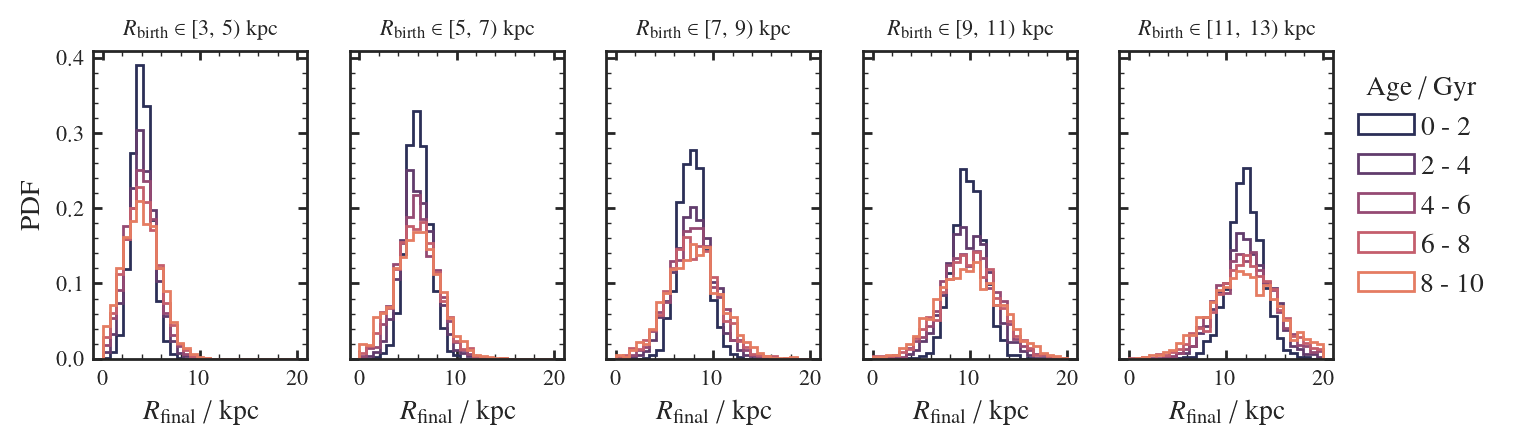

In [38]:
fig, axs = plt.subplots(1, len(R_bins)-1, figsize=(8, 2), sharey=True)

for i in range(len(R_bins)-1):
    plt.sca(axs[i])
    filt = stars.R_bin == i
    df = stars[filt]
    
    hm = arya.HueMap((0, len(age_labels)))
    for ii in range(len(age_labels) - 1):
        g = df[df.age_bin == ii]
        print(np.mean(g.formation_time))
        plt.hist(g.r_final, histtype="step", weights=g.mass, density=True, label=age_labels[ii], color=hm(ii), bins=np.linspace(0, 20, 30))

    
    plt.xlabel(r"$R_{\rm final}$ / kpc")
    plt.title(R_labels[i])
    if i == 0:
        plt.ylabel("PDF")
    if i == len(R_bins) - 2:
        arya.Legend(-1, title="Age / Gyr")        



12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19
12.189999999999998
10.19
8.19
6.19
4.19


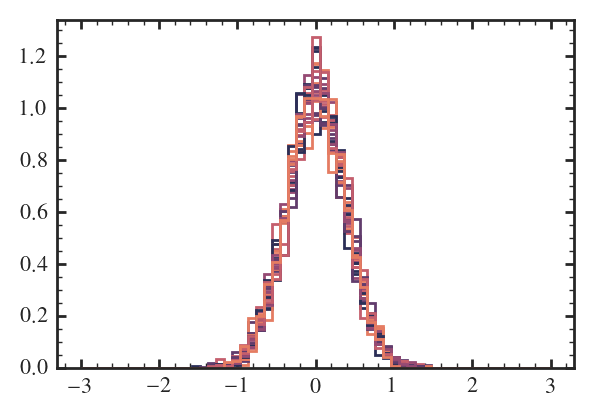

In [44]:

for i in range(len(R_bins)-1):
    filt = stars.R_bin == i
    df = stars[filt]
    
    hm = arya.HueMap((0, len(age_labels)))
    for ii in range(len(age_labels) - 1):
        g = df[df.age_bin == ii]
        print(np.mean(g.formation_time))
        plt.hist((g.r_final - g.r_origin) / g.r_origin**0.61 / (13.2 - g.formation_time)**0.33, histtype="step", weights=g.mass, density=True, label=age_labels[ii], color=hm(ii), bins=np.linspace(-3, 3, 60))
     



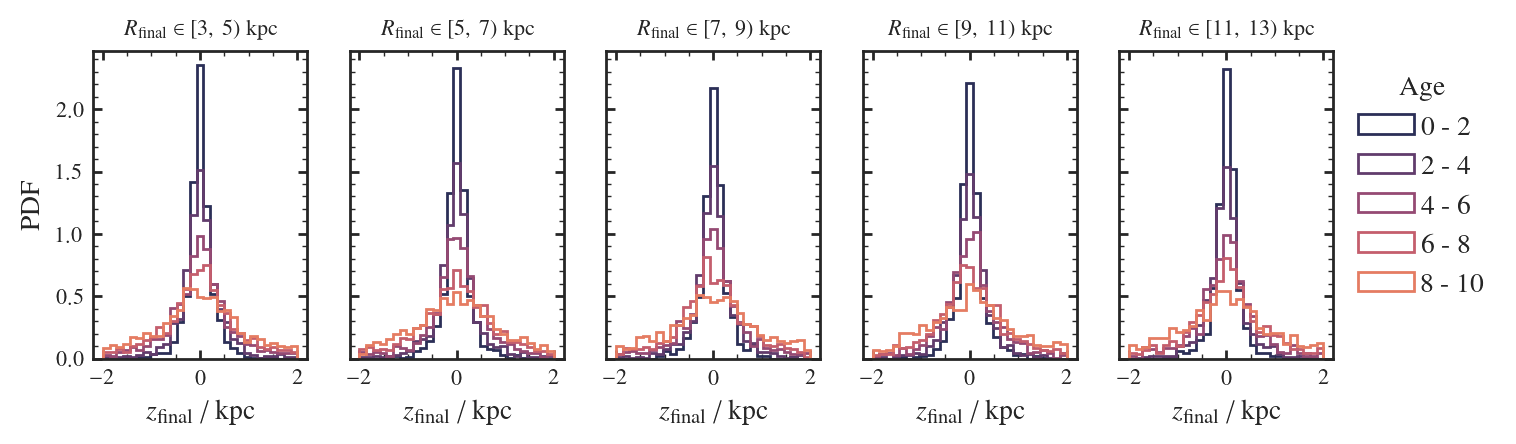

In [17]:
fig, axs = plt.subplots(1, len(R_bins)-1, figsize=(8, 2), sharey=True)

for i in range(len(R_bins)-1):
    plt.sca(axs[i])
    filt = stars.R_bin_final == i
    df = stars[filt]
    
    hm = arya.HueMap((0, len(age_labels)))
    for ii in range(len(age_labels) - 1):
        g = df[df.age_bin == ii]
    
        plt.hist(g.z_final, histtype="step", weights=g.mass, density=True, label=age_labels[ii], color=hm(ii), bins=np.linspace(-2, 2, 30))

    
    plt.xlabel(r"$z_{\rm final}$ / kpc")
    plt.title(R_labels_final[i])

    if i == 0:
        plt.ylabel("PDF")
        
    if i == len(R_bins) - 2:
        arya.Legend(-1, title="Age")  

In [18]:
import vice

In [19]:
mm = vice.toolkit.analytic_migration.migration_models.final_positions_gaussian_py()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  6.,  6.,  2.,
         7.,  5.,  9., 14., 20., 21., 30., 31., 34., 42., 50., 45., 46.,
        41., 49., 42., 53., 49., 39., 49., 48., 40., 35., 26., 29., 19.,
        28., 11., 18., 12., 11., 11.,  5.,  6.,  4.,  1.,  2.]),
 array([-4.06385349, -3.64691656, -3.22997964, -2.81304271, -2.39610579,
        -1.97916886, -1.56223193, -1.14529501, -0.72835808, -0.31142116,
         0.10551577,  0.5224527 ,  0.93938962,  1.35632655,  1.77326347,
         2.1902004 ,  2.60713733,  3.02407425,  3.44101118,  3.8579481 ,
         4.27488503,  4.69182196,  5.10875888,  5.52569581,  5.94263273,
         6.35956966,  6.77650659,  7.19344351,  7.61038044,  8.02731736,
         8.44425429,  8.86119122,  9.27812814,  9.69506507, 10.11200199,
        10.52893892, 10.94587585, 11.36281277, 11.7797497 , 12.19668662,
        12.61362355, 13.03056047, 13.4474974 , 13.86443433, 14.28137125,
        14.69830818, 15.1152451 , 15.53218203, 15.94911896,

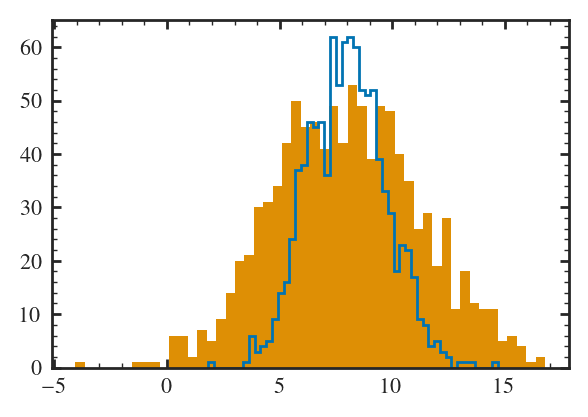

In [26]:
samples = [mm(8.0, 11.2, 0, 13.2)[0] for i in range(1000)]
plt.hist(samples, histtype="step")

samples = [mm(8.0, 0.0, 0, 13.2)[0] for i in range(1000)]
plt.hist(samples)